# XGBoost  모델

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [6]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split
from tqdm import tqdm 

In [7]:
final_df = pd.read_csv('C:/Users/User/ML/final_df.csv', header = 0, engine="python")
final_df = final_df.drop(columns='Unnamed: 0')
final_df.head()

,gameDuration,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,dragonKillsDiff,baronKillsDiff,inhibitorKillsDiff,...,killsDiff,assistDiff,championDamageDealtDiff,totalGoldDiff,totalMinionKillsDiff,avgLevelDiff,killingSpreeDiff,objectDamageDealtDiff,avgKDADiff,sustainedWardsDiff
0,20분이상 30분미만,0,1,1,0,0,0,-3,0,0,...,-0.461538,-0.551724,-0.112096,-0.000965,0.029482,-0.032258,-0.333333,0.145882,-0.793510,-0.191489
1,20분이상 30분미만,0,0,1,0,0,0,-2,0,0,...,-0.571429,-0.653846,-0.189156,-0.050191,0.049394,-0.058824,-0.600000,-0.061948,-0.881579,-0.342105
2,20분이상 30분미만,1,0,0,1,1,1,-1,1,2,...,0.395349,0.469880,0.023432,0.111697,0.016393,0.064748,0.555556,0.270663,0.714286,0.030928
3,20분이상 30분미만,0,1,1,0,1,0,1,0,0,...,-0.095238,-0.278689,0.050940,-0.038586,-0.033852,-0.062500,-0.166667,-0.212191,-0.293424,-0.044444
4,30분이상 40분미만,1,1,1,0,1,1,3,0,2,...,0.166667,0.195876,0.164727,0.042377,-0.042332,0.025974,0.200000,0.374054,0.340886,-0.045455


In [8]:
X = final_df.drop(columns=['gameDuration','blueWins'])
Y = final_df['blueWins']

indices_to_keep = ~X.isin([np.nan, np.inf, -np.inf]).any(1)
X = X[indices_to_keep].astype(np.float64) 
Y = Y[indices_to_keep]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y,train_size=0.7,test_size=0.3,random_state=1234)

In [9]:
game_length_bins = list(range(20, 50, 10))
game_length_bins_label = [str(x)+"분이상 "+str(x+10)+"분미만" for x in game_length_bins]

In [10]:
from sklearn.metrics import accuracy_score
result_mat = pd.DataFrame(columns=['accuracy'], index =game_length_bins_label)

In [11]:
for x in tqdm(game_length_bins_label):
    temp = final_df['gameDuration'] == x
    X = final_df[temp].drop(columns=['gameDuration','blueWins'])
    Y = final_df[temp]['blueWins']

    indices_to_keep = ~X.isin([np.nan, np.inf, -np.inf]).any(1)
    X = X[indices_to_keep].astype(np.float64) 
    Y = Y[indices_to_keep]
    # Input contains NaN, infinity or a value too large for dtype('float64') 에러 방지

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y,train_size=0.7,test_size=0.3,random_state=1234)
    
    xgb = XGBClassifier(n_estimators = 500, learning_rate = 0.01, max_depth = 5, random_state=0, eval_metric="logloss")
    xgb.fit(X_train, Y_train)
    
    Y_predict_xgb = xgb.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_predict_xgb)
    
    result_mat.loc[x]=[accuracy]

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [02:11<00:00, 43.99s/it]


In [12]:
result_mat

,accuracy
20분이상 30분미만,0.995157
30분이상 40분미만,0.984494
40분이상 50분미만,0.928922


In [13]:
from xgboost import plot_importance

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

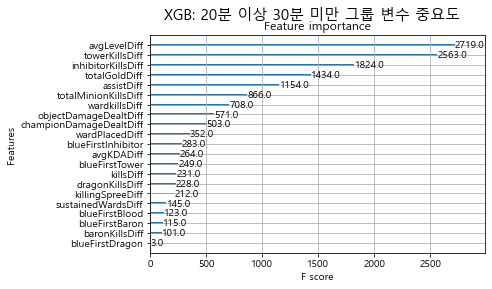

In [14]:
temp = final_df['gameDuration'] == '20분이상 30분미만' # 20-30 그룹의 변수 중요도 체크 
X = final_df[temp].drop(columns=['gameDuration','blueWins'])
Y = final_df[temp]['blueWins']

indices_to_keep = ~X.isin([np.nan, np.inf, -np.inf]).any(1)
X = X[indices_to_keep].astype(np.float64) 
Y = Y[indices_to_keep]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y,train_size=0.7,test_size=0.3,random_state=1234)

xgb = XGBClassifier(n_estimators = 500, learning_rate = 0.01, max_depth = 5, random_state=0, eval_metric="logloss")
xgb.fit(X_train, Y_train)

fig, ax = plt.subplots()
plt.suptitle('XGB: 20분 이상 30분 미만 그룹 변수 중요도',fontsize=15)
plot_importance(xgb, ax=ax)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

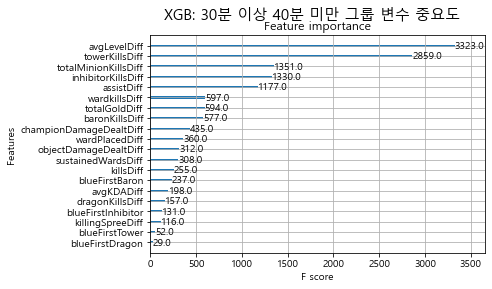

In [15]:
temp = final_df['gameDuration'] == '30분이상 40분미만' # 30-40 그룹의 변수 중요도 체크
X = final_df[temp].drop(columns=['gameDuration','blueWins'])
Y = final_df[temp]['blueWins']

indices_to_keep = ~X.isin([np.nan, np.inf, -np.inf]).any(1)
X = X[indices_to_keep].astype(np.float64) 
Y = Y[indices_to_keep]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y,train_size=0.7,test_size=0.3,random_state=1234)

xgb = XGBClassifier(n_estimators = 500, learning_rate = 0.01, max_depth = 5, random_state=0, eval_metric="logloss")
xgb.fit(X_train, Y_train)

fig, ax = plt.subplots()
plt.suptitle('XGB: 30분 이상 40분 미만 그룹 변수 중요도',fontsize=15)
plot_importance(xgb, ax=ax)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

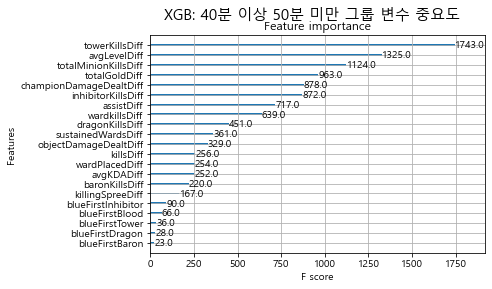

In [16]:
temp = final_df['gameDuration'] == '40분이상 50분미만' # 40-50 그룹의 변수 중요도 체크
X = final_df[temp].drop(columns=['gameDuration','blueWins'])
Y = final_df[temp]['blueWins']

indices_to_keep = ~X.isin([np.nan, np.inf, -np.inf]).any(1)
X = X[indices_to_keep].astype(np.float64) 
Y = Y[indices_to_keep]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y,train_size=0.7,test_size=0.3,random_state=1234)

xgb = XGBClassifier(n_estimators = 500, learning_rate = 0.01, max_depth = 5, random_state=0, eval_metric="logloss")
xgb.fit(X_train, Y_train)

fig, ax = plt.subplots()
plt.suptitle('XGB: 40분 이상 50분 미만 그룹 변수 중요도',fontsize=15)
plot_importance(xgb, ax=ax)

In [36]:
# XGBoost 변수 중요도 top 5
feature_importance_rank = pd.DataFrame(columns=['features','1위','2위','3위','4위','5위'], index =[1,2,3,4,5])
feature_importance_rank.loc[1] = ['avgLevelDiff', 2, 1, 0, 0, 0]
feature_importance_rank.loc[2] = ['towerKillsDiff', 1,2,0,0,0]
feature_importance_rank.loc[3] = ['totalMinionKillsDiff' ,0,0,2,0,0]
feature_importance_rank.loc[4] = ['inhibitorKillsDiff', 0,0,1,1,0]
feature_importance_rank.loc[5] = ['totalGoldDiff', 0,0,0,2,0]

feature_importance_rank.head()

,features,1위,2위,3위,4위,5위
1,avgLevelDiff,2,1,0,0,0
2,towerKillsDiff,1,2,0,0,0
3,totalMinionKillsDiff,0,0,2,0,0
4,inhibitorKillsDiff,0,0,1,1,0
5,totalGoldDiff,0,0,0,2,0


# CatBoost 모델

In [18]:
for x in tqdm(game_length_bins_label):
    temp = final_df['gameDuration'] == x
    X = final_df[temp].drop(columns=['gameDuration','blueWins'])
    Y = final_df[temp]['blueWins']

    indices_to_keep = ~X.isin([np.nan, np.inf, -np.inf]).any(1)
    X = X[indices_to_keep].astype(np.float64) 
    Y = Y[indices_to_keep]

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y,train_size=0.7,test_size=0.3,random_state=1234)
    
    cat = CatBoostClassifier(iterations = 500,random_seed = 63,learning_rate = 0.1,loss_function = 'Logloss')
    cat.fit(X_train, Y_train)
    
    Y_predict_cat = cat.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_predict_cat)
    
    result_mat.loc[x]=[accuracy]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

0:	learn: 0.4784752	total: 232ms	remaining: 1m 55s
1:	learn: 0.3204560	total: 281ms	remaining: 1m 9s
2:	learn: 0.1928723	total: 337ms	remaining: 55.9s
3:	learn: 0.1248639	total: 387ms	remaining: 48s
4:	learn: 0.0857018	total: 452ms	remaining: 44.8s
5:	learn: 0.0636506	total: 540ms	remaining: 44.5s
6:	learn: 0.0496174	total: 615ms	remaining: 43.3s
7:	learn: 0.0412964	total: 687ms	remaining: 42.3s
8:	learn: 0.0357000	total: 758ms	remaining: 41.4s
9:	learn: 0.0318565	total: 818ms	remaining: 40.1s
10:	learn: 0.0290303	total: 883ms	remaining: 39.2s
11:	learn: 0.0269128	total: 962ms	remaining: 39.1s
12:	learn: 0.0249350	total: 1.02s	remaining: 38.3s
13:	learn: 0.0239235	total: 1.09s	remaining: 37.7s
14:	learn: 0.0228329	total: 1.14s	remaining: 36.9s
15:	learn: 0.0220662	total: 1.19s	remaining: 35.9s
16:	learn: 0.0215173	total: 1.24s	remaining: 35.1s
17:	learn: 0.0208271	total: 1.28s	remaining: 34.4s
18:	learn: 0.0202164	total: 1.34s	remaining: 33.8s
19:	learn: 0.0197279	total: 1.39s	remainin

164:	learn: 0.0099612	total: 8.13s	remaining: 16.5s
165:	learn: 0.0098990	total: 8.2s	remaining: 16.5s
166:	learn: 0.0098989	total: 8.23s	remaining: 16.4s
167:	learn: 0.0098866	total: 8.27s	remaining: 16.3s
168:	learn: 0.0098797	total: 8.31s	remaining: 16.3s
169:	learn: 0.0098538	total: 8.36s	remaining: 16.2s
170:	learn: 0.0098481	total: 8.4s	remaining: 16.2s
171:	learn: 0.0097971	total: 8.45s	remaining: 16.1s
172:	learn: 0.0097599	total: 8.5s	remaining: 16.1s
173:	learn: 0.0097291	total: 8.55s	remaining: 16s
174:	learn: 0.0097291	total: 8.59s	remaining: 16s
175:	learn: 0.0097068	total: 8.64s	remaining: 15.9s
176:	learn: 0.0097017	total: 8.69s	remaining: 15.9s
177:	learn: 0.0096687	total: 8.74s	remaining: 15.8s
178:	learn: 0.0096357	total: 8.77s	remaining: 15.7s
179:	learn: 0.0096078	total: 8.82s	remaining: 15.7s
180:	learn: 0.0096030	total: 8.86s	remaining: 15.6s
181:	learn: 0.0095596	total: 8.92s	remaining: 15.6s
182:	learn: 0.0095329	total: 8.96s	remaining: 15.5s
183:	learn: 0.00946

327:	learn: 0.0083166	total: 14.8s	remaining: 7.74s
328:	learn: 0.0082959	total: 14.8s	remaining: 7.69s
329:	learn: 0.0082789	total: 14.9s	remaining: 7.66s
330:	learn: 0.0082789	total: 14.9s	remaining: 7.61s
331:	learn: 0.0082672	total: 15s	remaining: 7.57s
332:	learn: 0.0082435	total: 15s	remaining: 7.52s
333:	learn: 0.0081981	total: 15s	remaining: 7.47s
334:	learn: 0.0081981	total: 15.1s	remaining: 7.43s
335:	learn: 0.0081981	total: 15.1s	remaining: 7.38s
336:	learn: 0.0081981	total: 15.2s	remaining: 7.33s
337:	learn: 0.0081981	total: 15.2s	remaining: 7.29s
338:	learn: 0.0081925	total: 15.2s	remaining: 7.24s
339:	learn: 0.0081559	total: 15.3s	remaining: 7.2s
340:	learn: 0.0081559	total: 15.3s	remaining: 7.14s
341:	learn: 0.0081316	total: 15.4s	remaining: 7.1s
342:	learn: 0.0081316	total: 15.4s	remaining: 7.05s
343:	learn: 0.0081316	total: 15.4s	remaining: 7s
344:	learn: 0.0081299	total: 15.5s	remaining: 6.96s
345:	learn: 0.0081299	total: 15.5s	remaining: 6.9s
346:	learn: 0.0081299	to

487:	learn: 0.0080534	total: 21.6s	remaining: 531ms
488:	learn: 0.0080534	total: 21.6s	remaining: 486ms
489:	learn: 0.0080424	total: 21.7s	remaining: 442ms
490:	learn: 0.0080424	total: 21.7s	remaining: 398ms
491:	learn: 0.0080423	total: 21.7s	remaining: 353ms
492:	learn: 0.0080423	total: 21.8s	remaining: 309ms
493:	learn: 0.0080423	total: 21.8s	remaining: 265ms
494:	learn: 0.0080339	total: 21.8s	remaining: 221ms
495:	learn: 0.0080113	total: 21.9s	remaining: 177ms
496:	learn: 0.0080113	total: 21.9s	remaining: 132ms
497:	learn: 0.0079891	total: 22s	remaining: 88.3ms
498:	learn: 0.0079890	total: 22s	remaining: 44.1ms
499:	learn: 0.0079890	total: 22s	remaining: 0us


 33%|████████████████████████████                                                        | 1/3 [00:23<00:46, 23.21s/it]

0:	learn: 0.4903669	total: 32.6ms	remaining: 16.3s
1:	learn: 0.3380249	total: 62.8ms	remaining: 15.6s
2:	learn: 0.2320808	total: 85.4ms	remaining: 14.1s
3:	learn: 0.1678813	total: 105ms	remaining: 13s
4:	learn: 0.1302508	total: 125ms	remaining: 12.4s
5:	learn: 0.1078182	total: 145ms	remaining: 11.9s
6:	learn: 0.0938214	total: 164ms	remaining: 11.5s
7:	learn: 0.0838370	total: 183ms	remaining: 11.2s
8:	learn: 0.0770635	total: 212ms	remaining: 11.5s
9:	learn: 0.0718212	total: 249ms	remaining: 12.2s
10:	learn: 0.0665066	total: 287ms	remaining: 12.8s
11:	learn: 0.0630311	total: 317ms	remaining: 12.9s
12:	learn: 0.0608841	total: 345ms	remaining: 12.9s
13:	learn: 0.0586643	total: 367ms	remaining: 12.8s
14:	learn: 0.0568417	total: 390ms	remaining: 12.6s
15:	learn: 0.0549925	total: 422ms	remaining: 12.8s
16:	learn: 0.0538724	total: 451ms	remaining: 12.8s
17:	learn: 0.0523551	total: 475ms	remaining: 12.7s
18:	learn: 0.0513124	total: 499ms	remaining: 12.6s
19:	learn: 0.0503091	total: 524ms	remain

162:	learn: 0.0210344	total: 4.57s	remaining: 9.44s
163:	learn: 0.0208651	total: 4.59s	remaining: 9.4s
164:	learn: 0.0207400	total: 4.62s	remaining: 9.38s
165:	learn: 0.0207293	total: 4.68s	remaining: 9.41s
166:	learn: 0.0205534	total: 4.72s	remaining: 9.41s
167:	learn: 0.0204734	total: 4.77s	remaining: 9.42s
168:	learn: 0.0203553	total: 4.8s	remaining: 9.41s
169:	learn: 0.0202553	total: 4.84s	remaining: 9.39s
170:	learn: 0.0201924	total: 4.87s	remaining: 9.37s
171:	learn: 0.0201575	total: 4.93s	remaining: 9.41s
172:	learn: 0.0200060	total: 5.03s	remaining: 9.5s
173:	learn: 0.0198916	total: 5.08s	remaining: 9.53s
174:	learn: 0.0198725	total: 5.13s	remaining: 9.53s
175:	learn: 0.0198358	total: 5.18s	remaining: 9.54s
176:	learn: 0.0197489	total: 5.24s	remaining: 9.56s
177:	learn: 0.0197221	total: 5.29s	remaining: 9.56s
178:	learn: 0.0196081	total: 5.34s	remaining: 9.57s
179:	learn: 0.0195547	total: 5.38s	remaining: 9.56s
180:	learn: 0.0194261	total: 5.41s	remaining: 9.54s
181:	learn: 0.0

323:	learn: 0.0132992	total: 9.51s	remaining: 5.17s
324:	learn: 0.0132992	total: 9.53s	remaining: 5.13s
325:	learn: 0.0132807	total: 9.56s	remaining: 5.1s
326:	learn: 0.0132807	total: 9.58s	remaining: 5.07s
327:	learn: 0.0132806	total: 9.6s	remaining: 5.03s
328:	learn: 0.0132806	total: 9.62s	remaining: 5s
329:	learn: 0.0132806	total: 9.64s	remaining: 4.97s
330:	learn: 0.0132805	total: 9.67s	remaining: 4.94s
331:	learn: 0.0132805	total: 9.69s	remaining: 4.91s
332:	learn: 0.0132805	total: 9.72s	remaining: 4.87s
333:	learn: 0.0132805	total: 9.74s	remaining: 4.84s
334:	learn: 0.0132805	total: 9.76s	remaining: 4.81s
335:	learn: 0.0132804	total: 9.78s	remaining: 4.78s
336:	learn: 0.0132804	total: 9.8s	remaining: 4.74s
337:	learn: 0.0132804	total: 9.82s	remaining: 4.71s
338:	learn: 0.0132804	total: 9.85s	remaining: 4.67s
339:	learn: 0.0132804	total: 9.87s	remaining: 4.64s
340:	learn: 0.0132804	total: 9.89s	remaining: 4.61s
341:	learn: 0.0132804	total: 9.91s	remaining: 4.58s
342:	learn: 0.0132

483:	learn: 0.0113704	total: 13.6s	remaining: 450ms
484:	learn: 0.0113704	total: 13.6s	remaining: 422ms
485:	learn: 0.0113704	total: 13.7s	remaining: 394ms
486:	learn: 0.0113703	total: 13.7s	remaining: 366ms
487:	learn: 0.0113703	total: 13.7s	remaining: 337ms
488:	learn: 0.0113703	total: 13.7s	remaining: 309ms
489:	learn: 0.0113703	total: 13.8s	remaining: 281ms
490:	learn: 0.0113703	total: 13.8s	remaining: 253ms
491:	learn: 0.0113703	total: 13.8s	remaining: 225ms
492:	learn: 0.0113703	total: 13.8s	remaining: 197ms
493:	learn: 0.0113703	total: 13.9s	remaining: 168ms
494:	learn: 0.0113703	total: 13.9s	remaining: 140ms
495:	learn: 0.0113703	total: 13.9s	remaining: 112ms
496:	learn: 0.0113703	total: 13.9s	remaining: 84.1ms


 67%|████████████████████████████████████████████████████████                            | 2/3 [00:37<00:18, 18.23s/it]

497:	learn: 0.0113702	total: 14s	remaining: 56.1ms
498:	learn: 0.0113702	total: 14s	remaining: 28ms
499:	learn: 0.0113702	total: 14s	remaining: 0us
0:	learn: 0.6075984	total: 10.7ms	remaining: 5.34s
1:	learn: 0.5053047	total: 20.9ms	remaining: 5.2s
2:	learn: 0.4208938	total: 30.9ms	remaining: 5.13s
3:	learn: 0.3819571	total: 41.7ms	remaining: 5.17s
4:	learn: 0.3331719	total: 51ms	remaining: 5.05s
5:	learn: 0.2968054	total: 61.5ms	remaining: 5.07s
6:	learn: 0.2722458	total: 71.4ms	remaining: 5.03s
7:	learn: 0.2502977	total: 82.2ms	remaining: 5.05s
8:	learn: 0.2358679	total: 92ms	remaining: 5.02s
9:	learn: 0.2227294	total: 102ms	remaining: 5.02s
10:	learn: 0.2115452	total: 114ms	remaining: 5.06s
11:	learn: 0.2022299	total: 123ms	remaining: 5.02s
12:	learn: 0.1934120	total: 133ms	remaining: 4.99s
13:	learn: 0.1846125	total: 144ms	remaining: 4.98s
14:	learn: 0.1782426	total: 153ms	remaining: 4.96s
15:	learn: 0.1722466	total: 163ms	remaining: 4.94s
16:	learn: 0.1669006	total: 172ms	remainin

174:	learn: 0.0241096	total: 2.07s	remaining: 3.85s
175:	learn: 0.0239401	total: 2.08s	remaining: 3.83s
176:	learn: 0.0237067	total: 2.09s	remaining: 3.82s
177:	learn: 0.0234432	total: 2.11s	remaining: 3.81s
178:	learn: 0.0233158	total: 2.12s	remaining: 3.8s
179:	learn: 0.0230314	total: 2.13s	remaining: 3.78s
180:	learn: 0.0228303	total: 2.14s	remaining: 3.77s
181:	learn: 0.0225581	total: 2.15s	remaining: 3.76s
182:	learn: 0.0222998	total: 2.16s	remaining: 3.74s
183:	learn: 0.0221885	total: 2.17s	remaining: 3.72s
184:	learn: 0.0218760	total: 2.18s	remaining: 3.71s
185:	learn: 0.0217196	total: 2.19s	remaining: 3.69s
186:	learn: 0.0214795	total: 2.2s	remaining: 3.68s
187:	learn: 0.0213642	total: 2.21s	remaining: 3.66s
188:	learn: 0.0211008	total: 2.21s	remaining: 3.64s
189:	learn: 0.0210319	total: 2.22s	remaining: 3.63s
190:	learn: 0.0209810	total: 2.23s	remaining: 3.61s
191:	learn: 0.0207345	total: 2.24s	remaining: 3.6s
192:	learn: 0.0203807	total: 2.25s	remaining: 3.58s
193:	learn: 0.0

342:	learn: 0.0075259	total: 3.75s	remaining: 1.72s
343:	learn: 0.0074714	total: 3.76s	remaining: 1.7s
344:	learn: 0.0074518	total: 3.77s	remaining: 1.69s
345:	learn: 0.0074320	total: 3.79s	remaining: 1.68s
346:	learn: 0.0073736	total: 3.8s	remaining: 1.68s
347:	learn: 0.0073690	total: 3.82s	remaining: 1.67s
348:	learn: 0.0073358	total: 3.83s	remaining: 1.66s
349:	learn: 0.0073038	total: 3.84s	remaining: 1.65s
350:	learn: 0.0072805	total: 3.86s	remaining: 1.64s
351:	learn: 0.0072452	total: 3.87s	remaining: 1.63s
352:	learn: 0.0071816	total: 3.88s	remaining: 1.61s
353:	learn: 0.0071489	total: 3.89s	remaining: 1.6s
354:	learn: 0.0070990	total: 3.9s	remaining: 1.59s
355:	learn: 0.0070989	total: 3.91s	remaining: 1.58s
356:	learn: 0.0070794	total: 3.92s	remaining: 1.57s
357:	learn: 0.0070419	total: 3.94s	remaining: 1.56s
358:	learn: 0.0070096	total: 3.95s	remaining: 1.55s
359:	learn: 0.0069531	total: 3.95s	remaining: 1.54s
360:	learn: 0.0069174	total: 3.96s	remaining: 1.52s
361:	learn: 0.00

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:44<00:00, 14.75s/it]


In [19]:
result_mat

,accuracy
20분이상 30분미만,0.996166
30분이상 40분미만,0.98975
40분이상 50분미만,0.941176


In [20]:
import seaborn as sns

In [21]:
temp = final_df['gameDuration'] == '20분이상 30분미만' # 20-30 그룹의 변수 중요도 체크
X = final_df[temp].drop(columns=['gameDuration','blueWins'])
Y = final_df[temp]['blueWins']

indices_to_keep = ~X.isin([np.nan, np.inf, -np.inf]).any(1)
X = X[indices_to_keep].astype(np.float64) 
Y = Y[indices_to_keep]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y,train_size=0.7,test_size=0.3,random_state=1234)

cat = CatBoostClassifier(iterations = 500, random_seed = 63,learning_rate = 0.1,loss_function = 'Logloss')
cat.fit(X_train, Y_train)

0:	learn: 0.4784752	total: 70.5ms	remaining: 35.2s
1:	learn: 0.3204560	total: 131ms	remaining: 32.5s
2:	learn: 0.1928723	total: 190ms	remaining: 31.5s
3:	learn: 0.1248639	total: 255ms	remaining: 31.7s
4:	learn: 0.0857018	total: 322ms	remaining: 31.9s
5:	learn: 0.0636506	total: 367ms	remaining: 30.2s
6:	learn: 0.0496174	total: 407ms	remaining: 28.6s
7:	learn: 0.0412964	total: 466ms	remaining: 28.7s
8:	learn: 0.0357000	total: 532ms	remaining: 29s
9:	learn: 0.0318565	total: 618ms	remaining: 30.3s
10:	learn: 0.0290303	total: 700ms	remaining: 31.1s
11:	learn: 0.0269128	total: 757ms	remaining: 30.8s
12:	learn: 0.0249350	total: 877ms	remaining: 32.8s
13:	learn: 0.0239235	total: 992ms	remaining: 34.4s
14:	learn: 0.0228329	total: 1.13s	remaining: 36.5s
15:	learn: 0.0220662	total: 1.21s	remaining: 36.5s
16:	learn: 0.0215173	total: 1.28s	remaining: 36.4s
17:	learn: 0.0208271	total: 1.35s	remaining: 36.2s
18:	learn: 0.0202164	total: 1.43s	remaining: 36.2s
19:	learn: 0.0197279	total: 1.51s	remainin

162:	learn: 0.0099960	total: 11.2s	remaining: 23.1s
163:	learn: 0.0099959	total: 11.2s	remaining: 23s
164:	learn: 0.0099612	total: 11.3s	remaining: 23s
165:	learn: 0.0098990	total: 11.4s	remaining: 22.9s
166:	learn: 0.0098989	total: 11.4s	remaining: 22.8s
167:	learn: 0.0098866	total: 11.5s	remaining: 22.7s
168:	learn: 0.0098797	total: 11.5s	remaining: 22.6s
169:	learn: 0.0098538	total: 11.6s	remaining: 22.5s
170:	learn: 0.0098481	total: 11.6s	remaining: 22.4s
171:	learn: 0.0097971	total: 11.7s	remaining: 22.3s
172:	learn: 0.0097599	total: 11.7s	remaining: 22.2s
173:	learn: 0.0097291	total: 11.8s	remaining: 22.1s
174:	learn: 0.0097291	total: 11.8s	remaining: 22s
175:	learn: 0.0097068	total: 11.9s	remaining: 21.9s
176:	learn: 0.0097017	total: 11.9s	remaining: 21.8s
177:	learn: 0.0096687	total: 12s	remaining: 21.7s
178:	learn: 0.0096357	total: 12s	remaining: 21.6s
179:	learn: 0.0096078	total: 12.1s	remaining: 21.5s
180:	learn: 0.0096030	total: 12.2s	remaining: 21.4s
181:	learn: 0.0095596	

323:	learn: 0.0083928	total: 18.9s	remaining: 10.3s
324:	learn: 0.0083425	total: 19s	remaining: 10.2s
325:	learn: 0.0083335	total: 19s	remaining: 10.1s
326:	learn: 0.0083335	total: 19.1s	remaining: 10.1s
327:	learn: 0.0083166	total: 19.1s	remaining: 10s
328:	learn: 0.0082959	total: 19.2s	remaining: 9.95s
329:	learn: 0.0082789	total: 19.2s	remaining: 9.89s
330:	learn: 0.0082789	total: 19.2s	remaining: 9.82s
331:	learn: 0.0082672	total: 19.3s	remaining: 9.75s
332:	learn: 0.0082435	total: 19.3s	remaining: 9.69s
333:	learn: 0.0081981	total: 19.4s	remaining: 9.64s
334:	learn: 0.0081981	total: 19.4s	remaining: 9.58s
335:	learn: 0.0081981	total: 19.5s	remaining: 9.51s
336:	learn: 0.0081981	total: 19.5s	remaining: 9.45s
337:	learn: 0.0081981	total: 19.6s	remaining: 9.38s
338:	learn: 0.0081925	total: 19.6s	remaining: 9.32s
339:	learn: 0.0081559	total: 19.7s	remaining: 9.27s
340:	learn: 0.0081559	total: 19.8s	remaining: 9.21s
341:	learn: 0.0081316	total: 19.8s	remaining: 9.15s
342:	learn: 0.0081

484:	learn: 0.0080535	total: 26.9s	remaining: 833ms
485:	learn: 0.0080535	total: 27s	remaining: 777ms
486:	learn: 0.0080535	total: 27s	remaining: 721ms
487:	learn: 0.0080534	total: 27.1s	remaining: 666ms
488:	learn: 0.0080534	total: 27.1s	remaining: 610ms
489:	learn: 0.0080424	total: 27.2s	remaining: 554ms
490:	learn: 0.0080424	total: 27.2s	remaining: 499ms
491:	learn: 0.0080423	total: 27.3s	remaining: 443ms
492:	learn: 0.0080423	total: 27.3s	remaining: 388ms
493:	learn: 0.0080423	total: 27.4s	remaining: 332ms
494:	learn: 0.0080339	total: 27.4s	remaining: 277ms
495:	learn: 0.0080113	total: 27.5s	remaining: 221ms
496:	learn: 0.0080113	total: 27.5s	remaining: 166ms
497:	learn: 0.0079891	total: 27.6s	remaining: 111ms
498:	learn: 0.0079890	total: 27.6s	remaining: 55.3ms
499:	learn: 0.0079890	total: 27.7s	remaining: 0us


Text(0.5, 1.0, 'CatBoost: 20분 이상 30분 미만 그룹 변수 중요도')

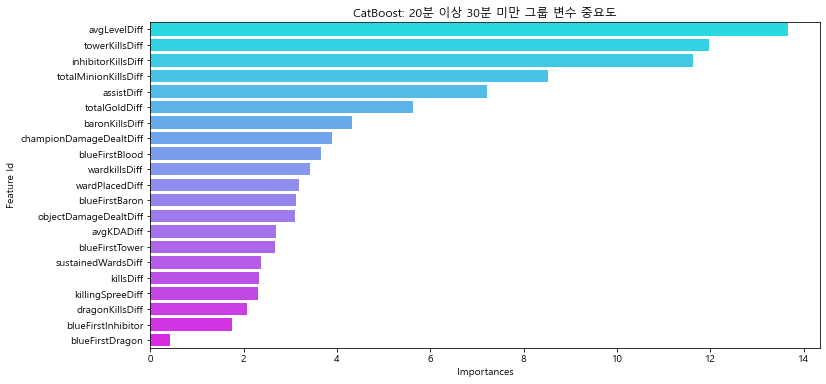

In [22]:
df_feature_importance = pd.DataFrame(cat.get_feature_importance(prettified=True))
plt.figure(figsize=(12, 6))
feature_plot= sns.barplot(x="Importances", y="Feature Id", data=df_feature_importance,palette="cool")
plt.title('CatBoost: 20분 이상 30분 미만 그룹 변수 중요도')

In [23]:
temp = final_df['gameDuration'] == '30분이상 40분미만' # 30-40 그룹의 변수 중요도 체크
X = final_df[temp].drop(columns=['gameDuration','blueWins'])
Y = final_df[temp]['blueWins']

indices_to_keep = ~X.isin([np.nan, np.inf, -np.inf]).any(1)
X = X[indices_to_keep].astype(np.float64) 
Y = Y[indices_to_keep]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y,train_size=0.7,test_size=0.3,random_state=1234)

cat = CatBoostClassifier(iterations = 500, random_seed = 63,learning_rate = 0.1,loss_function = 'Logloss')
cat.fit(X_train, Y_train)

0:	learn: 0.4903669	total: 33.7ms	remaining: 16.8s
1:	learn: 0.3380249	total: 57.8ms	remaining: 14.4s
2:	learn: 0.2320808	total: 85.8ms	remaining: 14.2s
3:	learn: 0.1678813	total: 120ms	remaining: 14.9s
4:	learn: 0.1302508	total: 152ms	remaining: 15s
5:	learn: 0.1078182	total: 188ms	remaining: 15.4s
6:	learn: 0.0938214	total: 210ms	remaining: 14.8s
7:	learn: 0.0838370	total: 235ms	remaining: 14.5s
8:	learn: 0.0770635	total: 265ms	remaining: 14.4s
9:	learn: 0.0718212	total: 290ms	remaining: 14.2s
10:	learn: 0.0665066	total: 313ms	remaining: 13.9s
11:	learn: 0.0630311	total: 335ms	remaining: 13.6s
12:	learn: 0.0608841	total: 367ms	remaining: 13.7s
13:	learn: 0.0586643	total: 396ms	remaining: 13.8s
14:	learn: 0.0568417	total: 416ms	remaining: 13.5s
15:	learn: 0.0549925	total: 453ms	remaining: 13.7s
16:	learn: 0.0538724	total: 478ms	remaining: 13.6s
17:	learn: 0.0523551	total: 497ms	remaining: 13.3s
18:	learn: 0.0513124	total: 517ms	remaining: 13.1s
19:	learn: 0.0503091	total: 537ms	remain

166:	learn: 0.0205534	total: 4.52s	remaining: 9.02s
167:	learn: 0.0204734	total: 4.54s	remaining: 8.98s
168:	learn: 0.0203553	total: 4.57s	remaining: 8.96s
169:	learn: 0.0202553	total: 4.61s	remaining: 8.95s
170:	learn: 0.0201924	total: 4.65s	remaining: 8.95s
171:	learn: 0.0201575	total: 4.68s	remaining: 8.93s
172:	learn: 0.0200060	total: 4.72s	remaining: 8.92s
173:	learn: 0.0198916	total: 4.77s	remaining: 8.95s
174:	learn: 0.0198725	total: 4.81s	remaining: 8.94s
175:	learn: 0.0198358	total: 4.85s	remaining: 8.93s
176:	learn: 0.0197489	total: 4.89s	remaining: 8.93s
177:	learn: 0.0197221	total: 4.92s	remaining: 8.91s
178:	learn: 0.0196081	total: 4.96s	remaining: 8.89s
179:	learn: 0.0195547	total: 5s	remaining: 8.88s
180:	learn: 0.0194261	total: 5.03s	remaining: 8.87s
181:	learn: 0.0194151	total: 5.06s	remaining: 8.85s
182:	learn: 0.0193283	total: 5.1s	remaining: 8.84s
183:	learn: 0.0192608	total: 5.14s	remaining: 8.82s
184:	learn: 0.0192271	total: 5.16s	remaining: 8.78s
185:	learn: 0.01

333:	learn: 0.0132805	total: 8.93s	remaining: 4.43s
334:	learn: 0.0132805	total: 8.96s	remaining: 4.41s
335:	learn: 0.0132804	total: 8.99s	remaining: 4.39s
336:	learn: 0.0132804	total: 9.01s	remaining: 4.36s
337:	learn: 0.0132804	total: 9.03s	remaining: 4.33s
338:	learn: 0.0132804	total: 9.05s	remaining: 4.3s
339:	learn: 0.0132804	total: 9.07s	remaining: 4.27s
340:	learn: 0.0132804	total: 9.1s	remaining: 4.24s
341:	learn: 0.0132804	total: 9.12s	remaining: 4.21s
342:	learn: 0.0132804	total: 9.15s	remaining: 4.19s
343:	learn: 0.0132804	total: 9.17s	remaining: 4.16s
344:	learn: 0.0132804	total: 9.19s	remaining: 4.13s
345:	learn: 0.0132804	total: 9.22s	remaining: 4.1s
346:	learn: 0.0132803	total: 9.24s	remaining: 4.07s
347:	learn: 0.0132803	total: 9.26s	remaining: 4.05s
348:	learn: 0.0132803	total: 9.29s	remaining: 4.02s
349:	learn: 0.0132803	total: 9.31s	remaining: 3.99s
350:	learn: 0.0132803	total: 9.33s	remaining: 3.96s
351:	learn: 0.0132802	total: 9.35s	remaining: 3.93s
352:	learn: 0.0

494:	learn: 0.0113703	total: 13.2s	remaining: 133ms
495:	learn: 0.0113703	total: 13.2s	remaining: 107ms
496:	learn: 0.0113703	total: 13.2s	remaining: 80ms
497:	learn: 0.0113702	total: 13.3s	remaining: 53.3ms
498:	learn: 0.0113702	total: 13.3s	remaining: 26.7ms
499:	learn: 0.0113702	total: 13.3s	remaining: 0us


Text(0.5, 1.0, 'CatBoost: 30분 이상 40분 미만 그룹 변수 중요도')

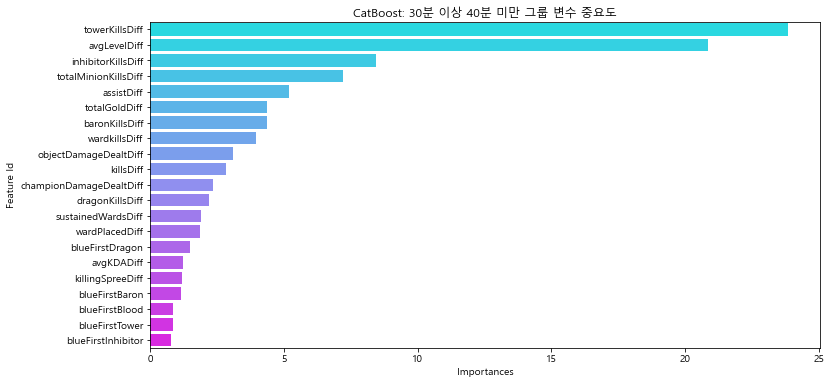

In [24]:
df_feature_importance = pd.DataFrame(cat.get_feature_importance(prettified=True))
plt.figure(figsize=(12, 6))
feature_plot= sns.barplot(x="Importances", y="Feature Id", data=df_feature_importance,palette="cool")
plt.title('CatBoost: 30분 이상 40분 미만 그룹 변수 중요도')

In [25]:
temp = final_df['gameDuration'] == '40분이상 50분미만' # 40-50 그룹의 변수 중요도 체크
X = final_df[temp].drop(columns=['gameDuration','blueWins'])
Y = final_df[temp]['blueWins']

indices_to_keep = ~X.isin([np.nan, np.inf, -np.inf]).any(1)
X = X[indices_to_keep].astype(np.float64) 
Y = Y[indices_to_keep]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y,train_size=0.7,test_size=0.3,random_state=1234)

cat = CatBoostClassifier(iterations = 500, random_seed = 63,learning_rate = 0.1,loss_function = 'Logloss')
cat.fit(X_train, Y_train)

0:	learn: 0.6075984	total: 13.6ms	remaining: 6.79s
1:	learn: 0.5053047	total: 23ms	remaining: 5.72s
2:	learn: 0.4208938	total: 30.4ms	remaining: 5.04s
3:	learn: 0.3819571	total: 40.2ms	remaining: 4.99s
4:	learn: 0.3331719	total: 48.8ms	remaining: 4.83s
5:	learn: 0.2968054	total: 57.2ms	remaining: 4.71s
6:	learn: 0.2722458	total: 66ms	remaining: 4.64s
7:	learn: 0.2502977	total: 74.7ms	remaining: 4.59s
8:	learn: 0.2358679	total: 83.2ms	remaining: 4.54s
9:	learn: 0.2227294	total: 92.9ms	remaining: 4.55s
10:	learn: 0.2115452	total: 102ms	remaining: 4.54s
11:	learn: 0.2022299	total: 112ms	remaining: 4.54s
12:	learn: 0.1934120	total: 120ms	remaining: 4.49s
13:	learn: 0.1846125	total: 129ms	remaining: 4.5s
14:	learn: 0.1782426	total: 138ms	remaining: 4.45s
15:	learn: 0.1722466	total: 145ms	remaining: 4.4s
16:	learn: 0.1669006	total: 153ms	remaining: 4.34s
17:	learn: 0.1615502	total: 161ms	remaining: 4.32s
18:	learn: 0.1563010	total: 170ms	remaining: 4.3s
19:	learn: 0.1524860	total: 180ms	rema

162:	learn: 0.0270006	total: 1.71s	remaining: 3.54s
163:	learn: 0.0269139	total: 1.73s	remaining: 3.54s
164:	learn: 0.0265737	total: 1.74s	remaining: 3.54s
165:	learn: 0.0264198	total: 1.75s	remaining: 3.53s
166:	learn: 0.0263370	total: 1.77s	remaining: 3.53s
167:	learn: 0.0261605	total: 1.78s	remaining: 3.52s
168:	learn: 0.0258797	total: 1.79s	remaining: 3.51s
169:	learn: 0.0254770	total: 1.81s	remaining: 3.51s
170:	learn: 0.0250567	total: 1.82s	remaining: 3.5s
171:	learn: 0.0246089	total: 1.83s	remaining: 3.5s
172:	learn: 0.0245988	total: 1.84s	remaining: 3.49s
173:	learn: 0.0242972	total: 1.86s	remaining: 3.49s
174:	learn: 0.0241096	total: 1.87s	remaining: 3.48s
175:	learn: 0.0239401	total: 1.89s	remaining: 3.47s
176:	learn: 0.0237067	total: 1.9s	remaining: 3.47s
177:	learn: 0.0234432	total: 1.92s	remaining: 3.47s
178:	learn: 0.0233158	total: 1.93s	remaining: 3.46s
179:	learn: 0.0230314	total: 1.94s	remaining: 3.44s
180:	learn: 0.0228303	total: 1.95s	remaining: 3.43s
181:	learn: 0.0

334:	learn: 0.0077584	total: 3.41s	remaining: 1.68s
335:	learn: 0.0077338	total: 3.42s	remaining: 1.67s
336:	learn: 0.0076891	total: 3.42s	remaining: 1.66s
337:	learn: 0.0076657	total: 3.43s	remaining: 1.64s
338:	learn: 0.0076064	total: 3.44s	remaining: 1.63s
339:	learn: 0.0075549	total: 3.45s	remaining: 1.62s
340:	learn: 0.0075292	total: 3.46s	remaining: 1.61s
341:	learn: 0.0075291	total: 3.46s	remaining: 1.6s
342:	learn: 0.0075259	total: 3.47s	remaining: 1.59s
343:	learn: 0.0074714	total: 3.48s	remaining: 1.58s
344:	learn: 0.0074518	total: 3.49s	remaining: 1.57s
345:	learn: 0.0074320	total: 3.5s	remaining: 1.56s
346:	learn: 0.0073736	total: 3.51s	remaining: 1.55s
347:	learn: 0.0073690	total: 3.52s	remaining: 1.54s
348:	learn: 0.0073358	total: 3.53s	remaining: 1.52s
349:	learn: 0.0073038	total: 3.54s	remaining: 1.51s
350:	learn: 0.0072805	total: 3.54s	remaining: 1.5s
351:	learn: 0.0072452	total: 3.55s	remaining: 1.49s
352:	learn: 0.0071816	total: 3.56s	remaining: 1.48s
353:	learn: 0.0

Text(0.5, 1.0, 'CatBoost: 40분 이상 50분 미만 그룹 변수 중요도')

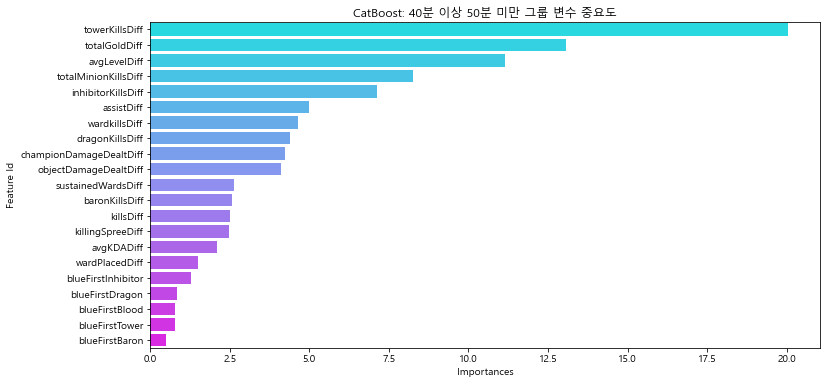

In [26]:
df_feature_importance = pd.DataFrame(cat.get_feature_importance(prettified=True))
plt.figure(figsize=(12, 6))
feature_plot= sns.barplot(x="Importances", y="Feature Id", data=df_feature_importance,palette="cool")
plt.title('CatBoost: 40분 이상 50분 미만 그룹 변수 중요도')

In [38]:
# CatBoost 변수 중요도 top 5
feature_importance_rank = pd.DataFrame(columns=['features','1위','2위','3위','4위','5위'], index =[1,2,3,4,5])
feature_importance_rank.loc[1] = ['towerKillsDiff', 2,1,0,0,0]
feature_importance_rank.loc[2] = ['avgLevelDiff ', 1,1,1,0,0]
feature_importance_rank.loc[3] = ['inhibitorKillsDiff ', 0,0,2,0,1]
feature_importance_rank.loc[4] = ['totalMinionKillsDiff', 0,0,0,3,0]
feature_importance_rank.loc[5] = ['totalGoldDiff', 0,1,0,0,0]

feature_importance_rank.head()

,features,1위,2위,3위,4위,5위
1,towerKillsDiff,2,1,0,0,0
2,avgLevelDiff,1,1,1,0,0
3,inhibitorKillsDiff,0,0,2,0,1
4,totalMinionKillsDiff,0,0,0,3,0
5,totalGoldDiff,0,1,0,0,0


# LightGBM 모델

In [28]:
for x in tqdm(game_length_bins_label):
    temp = final_df['gameDuration'] == x
    X = final_df[temp].drop(columns=['gameDuration','blueWins'])
    Y = final_df[temp]['blueWins']

    indices_to_keep = ~X.isin([np.nan, np.inf, -np.inf]).any(1)
    X = X[indices_to_keep].astype(np.float64) 
    Y = Y[indices_to_keep]

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y,train_size=0.7,test_size=0.3,random_state=1234)
    
    lgbm = LGBMClassifier(n_estimators = 500, learning_rate=0.1, max_depth = 5, random_state=0)
    lgbm.fit(X_train, Y_train)
    
    Y_predict_lgbm = lgbm.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_predict_lgbm)
    result_mat.loc[x]=[accuracy]

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:17<00:00,  5.99s/it]


In [29]:
result_mat

,accuracy
20분이상 30분미만,0.995897
30분이상 40분미만,0.9894
40분이상 50분미만,0.946078


In [30]:
from lightgbm import plot_importance

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

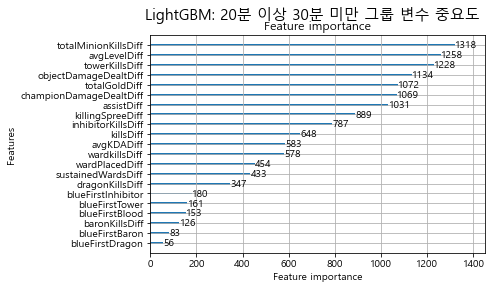

In [31]:
temp = final_df['gameDuration'] == '20분이상 30분미만' # 20-30 그룹의 변수 중요도 체크 
X = final_df[temp].drop(columns=['gameDuration','blueWins'])
Y = final_df[temp]['blueWins']

indices_to_keep = ~X.isin([np.nan, np.inf, -np.inf]).any(1)
X = X[indices_to_keep].astype(np.float64) 
Y = Y[indices_to_keep]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y,train_size=0.7,test_size=0.3,random_state=1234)

lgbm = LGBMClassifier(n_estimators = 500, learning_rate=0.1, max_depth = 5, random_state=0)
lgbm.fit(X_train, Y_train)

fig, ax = plt.subplots()
plt.suptitle('LightGBM: 20분 이상 30분 미만 그룹 변수 중요도',fontsize=15)
plot_importance(lgbm, ax=ax)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

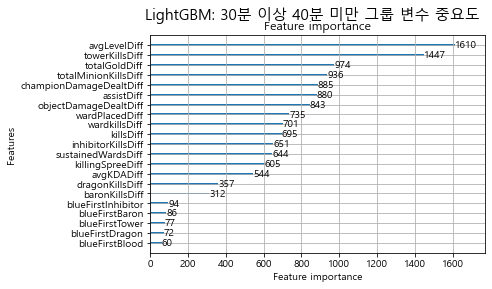

In [32]:
temp = final_df['gameDuration'] == '30분이상 40분미만' # 30-40 그룹의 변수 중요도 체크 
X = final_df[temp].drop(columns=['gameDuration','blueWins'])
Y = final_df[temp]['blueWins']

indices_to_keep = ~X.isin([np.nan, np.inf, -np.inf]).any(1)
X = X[indices_to_keep].astype(np.float64) 
Y = Y[indices_to_keep]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y,train_size=0.7,test_size=0.3,random_state=1234)

lgbm = LGBMClassifier(n_estimators = 500, learning_rate=0.1, max_depth = 5, random_state=0)
lgbm.fit(X_train, Y_train)

fig, ax = plt.subplots()
plt.suptitle('LightGBM: 30분 이상 40분 미만 그룹 변수 중요도',fontsize=15)
plot_importance(lgbm, ax=ax)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

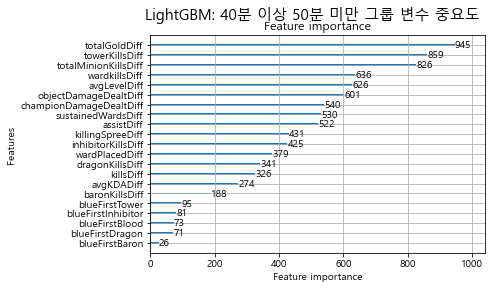

In [33]:
temp = final_df['gameDuration'] == '40분이상 50분미만' # 40-50 그룹의 변수 중요도 체크 
X = final_df[temp].drop(columns=['gameDuration','blueWins'])
Y = final_df[temp]['blueWins']

indices_to_keep = ~X.isin([np.nan, np.inf, -np.inf]).any(1)
X = X[indices_to_keep].astype(np.float64) 
Y = Y[indices_to_keep]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y,train_size=0.7,test_size=0.3,random_state=1234)

lgbm = LGBMClassifier(n_estimators = 500, learning_rate=0.1, max_depth = 5, random_state=0)
lgbm.fit(X_train, Y_train)

fig, ax = plt.subplots()
plt.suptitle('LightGBM: 40분 이상 50분 미만 그룹 변수 중요도',fontsize=15)
plot_importance(lgbm, ax=ax)

In [41]:
# LightGBM 변수 중요도 top 5
feature_importance_rank = pd.DataFrame(columns=['features','1위','2위','3위','4위','5위'], index =[1,2,3,4,5])
feature_importance_rank.loc[1] = ['towerKillsDiff', 0,2,1,0,0]
feature_importance_rank.loc[2] = ['totalMinionKillsDiff(공동2위)', 1,0,1,1,0]
feature_importance_rank.loc[3] = ['avgLevelDiff(공동2위)', 1,1,0,0,1]
feature_importance_rank.loc[4] = ['totalGoldDiff', 1,0,1,0,1]
feature_importance_rank.loc[5] = ['objectDamageDealtDiff', 0,0,0,1,0]

feature_importance_rank.head()

,features,1위,2위,3위,4위,5위
1,towerKillsDiff,0,2,1,0,0
2,totalMinionKillsDiff(공동2위),1,0,1,1,0
3,avgLevelDiff(공동2위),1,1,0,0,1
4,totalGoldDiff,1,0,1,0,1
5,objectDamageDealtDiff,0,0,0,1,0
